# TF-IDF para cada uno de los 8 temas

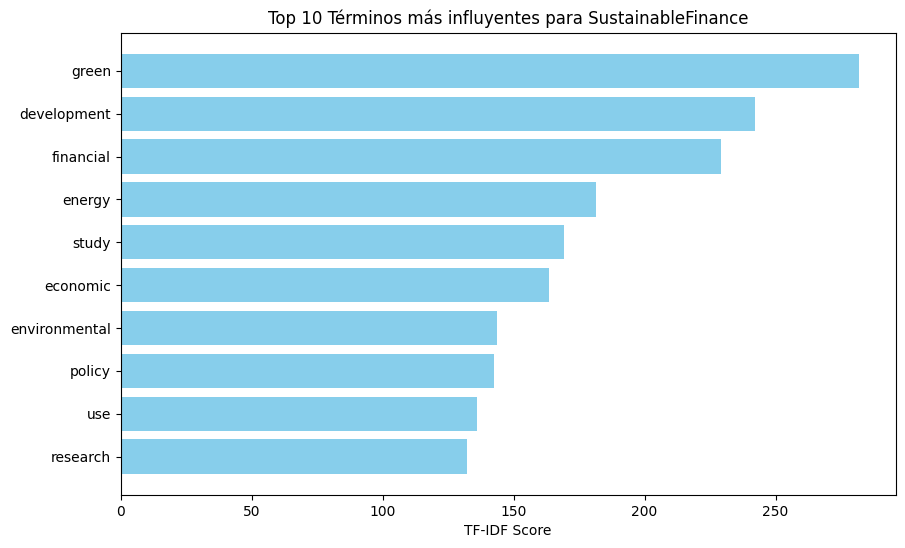

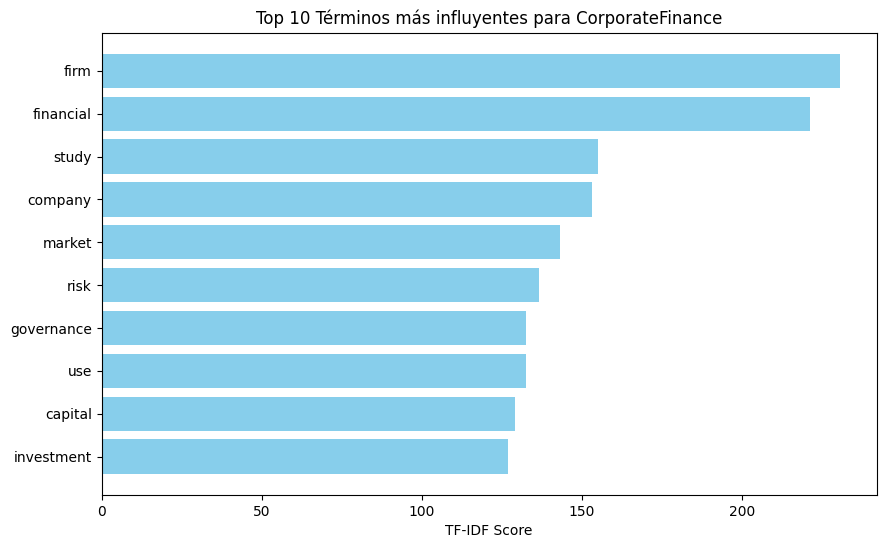

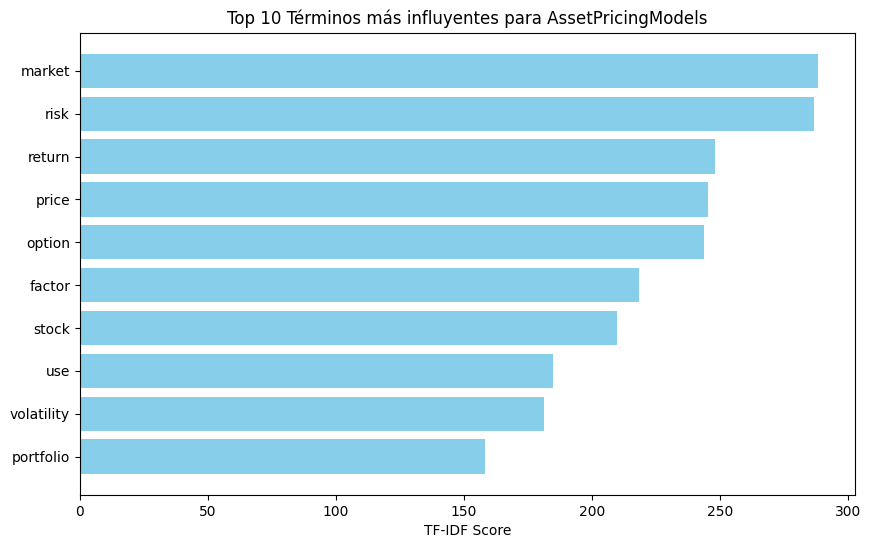

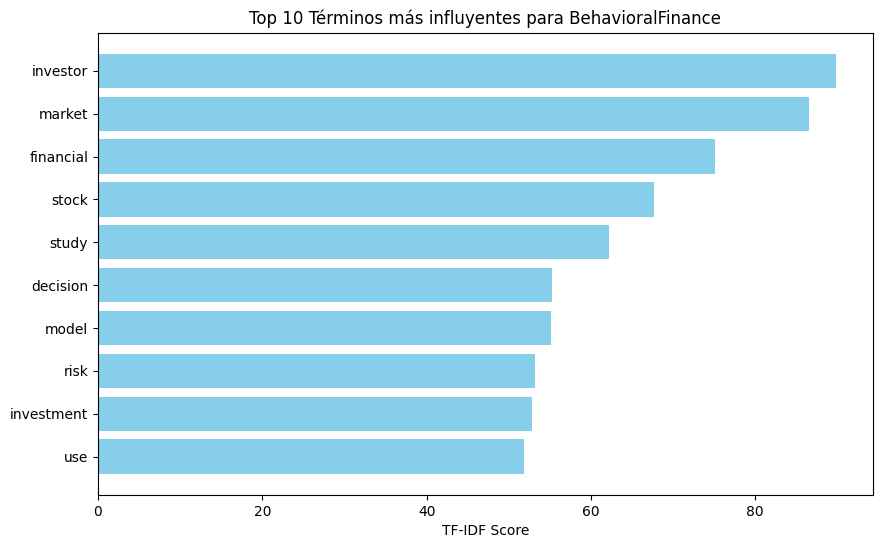

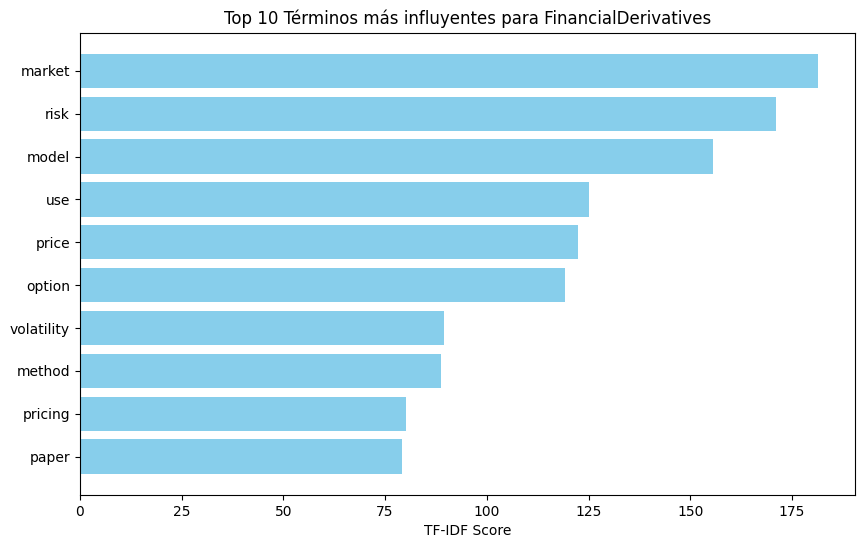

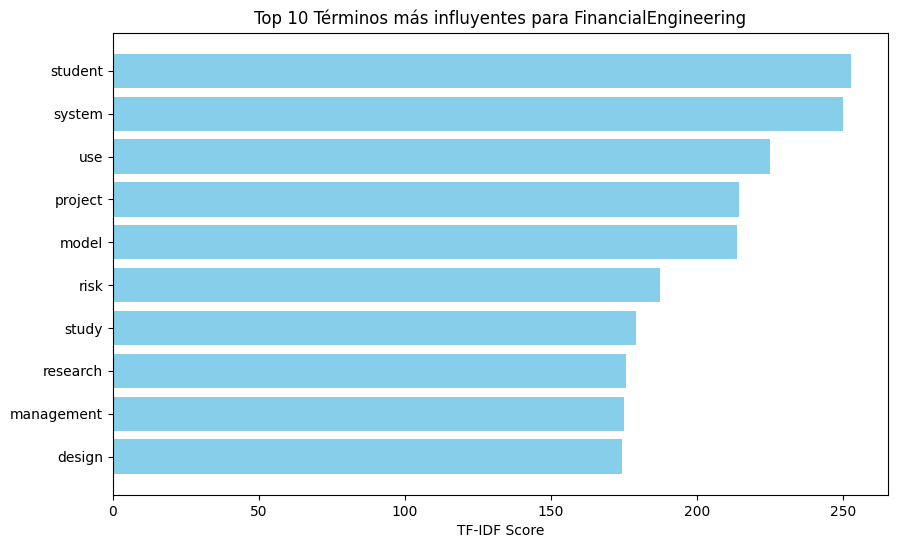

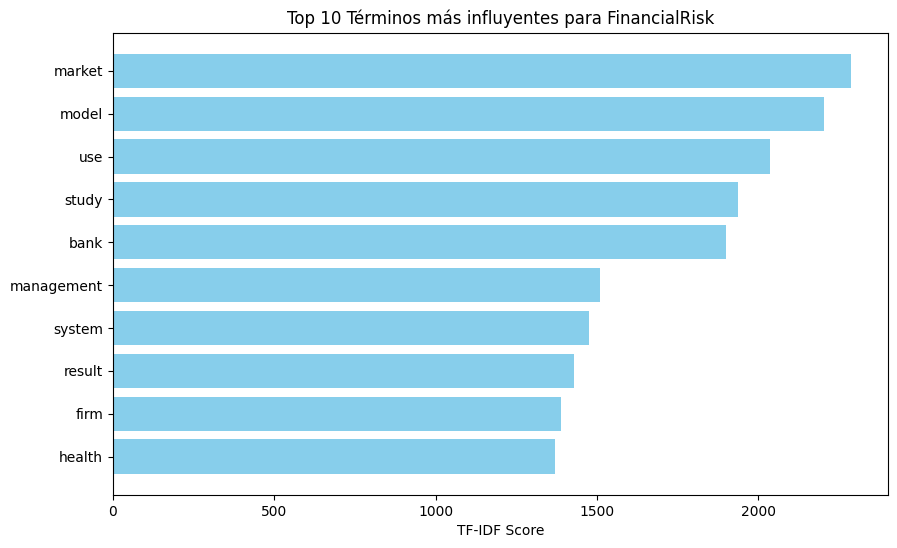

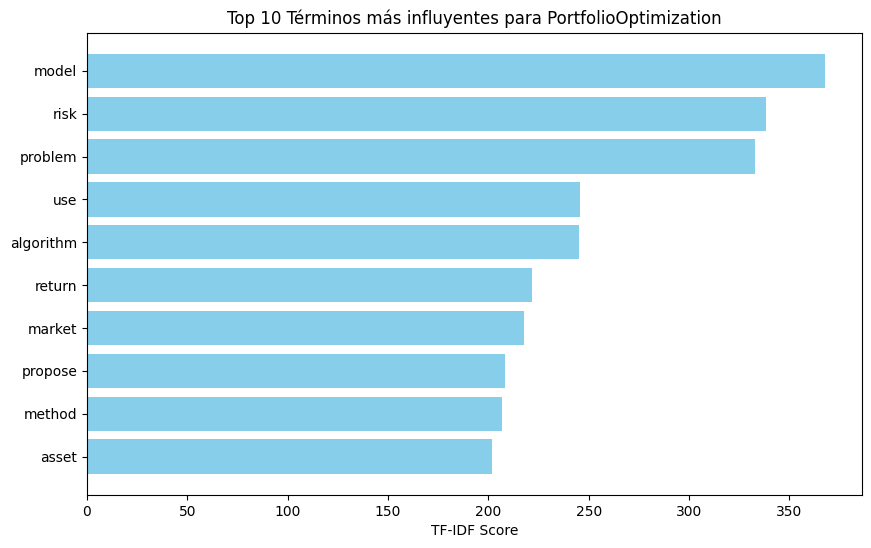

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo CSV con abstracts y temas
df = pd.read_csv('no_stopwords_abstracts.csv')

# Función para aplicar TF-IDF y visualizar el top 10 de términos más influyentes
def aplicar_tfidf_por_tema(df, tema, top_n=10):
    # Filtrar abstracts por tema
    abstracts_filtrados = df[df['Topic'] == tema]['Lemmas'].tolist()

    # Configurar y aplicar el vectorizador TF-IDF
    vectorizer = TfidfVectorizer(max_df=0.85, min_df=2, max_features=10000)
    tfidf_matrix = vectorizer.fit_transform(abstracts_filtrados)

    # Obtener los nombres de las características (palabras)
    feature_names = vectorizer.get_feature_names_out()

    # Sumar los valores TF-IDF por cada palabra
    summed_tfidf = np.array(tfidf_matrix.sum(axis=0)).flatten()

    # Obtener los índices de las palabras con mayor puntuación
    indices = np.argsort(summed_tfidf)[::-1][:top_n]

    # Extraer los términos y sus respectivas puntuaciones
    top_terms = [(feature_names[i], summed_tfidf[i]) for i in indices]

    # Visualización del top 10 de términos
    terms, scores = zip(*top_terms)
    plt.figure(figsize=(10, 6))
    plt.barh(terms, scores, color='skyblue')
    plt.xlabel('TF-IDF Score')
    plt.title(f'Top {top_n} Términos más influyentes para {tema}')
    plt.gca().invert_yaxis()  # Para mostrar los términos más relevantes arriba
    plt.show()

# Lista de temas
temas = df['Topic'].unique()

# Aplicar TF-IDF y visualizar para cada tema
for tema in temas:
    aplicar_tfidf_por_tema(df, tema)
